Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  


Data Collection

In [2]:
data = pd.read_csv("LoanApprovalPrediction.csv")

In [3]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,144.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
data.size

7774

In [5]:
# number of rows and columns
data.shape

(598, 13)

Data Preprocessing

In [6]:
data.drop("Loan_ID",axis=1,inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
data.query("Gender=='Male' and Loan_Status=='Y'")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,144.0,360.0,1.0,Urban,Y
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
591,Male,Yes,2.0,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
592,Male,Yes,0.0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
594,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [9]:
data.query("Gender=='Female' and Loan_Status=='Y'")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
28,Female,No,2.0,Graduate,Yes,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
36,Female,Yes,0.0,Graduate,No,3667,1459.0,144.0,360.0,1.0,Semiurban,Y
44,Female,No,0.0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
48,Female,No,0.0,Graduate,No,4000,2275.0,144.0,360.0,1.0,Semiurban,Y
49,Female,Yes,0.0,Not Graduate,No,1928,1644.0,100.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
548,Female,Yes,1.0,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
568,Female,Yes,0.0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y
573,Female,No,0.0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y
588,Female,Yes,1.0,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y


In [10]:
data.query("Gender=='Male' and Loan_Status=='N'")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
7,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
9,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
13,Male,No,0.0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
18,Male,Yes,0.0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...
574,Male,Yes,2.0,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
576,Male,Yes,2.0,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N
580,Male,Yes,2.0,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
581,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


In [11]:
data.query("Gender=='Female' and Loan_Status=='N'")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,Female,No,0.0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
47,Female,Yes,0.0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N
51,Female,No,0.0,Graduate,No,4230,0.0,112.0,360.0,1.0,Semiurban,N
53,Female,Yes,1.0,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
63,Female,No,0.0,Graduate,No,4166,0.0,116.0,360.0,0.0,Semiurban,N
68,Female,No,0.0,Graduate,No,4300,0.0,136.0,360.0,0.0,Semiurban,N
81,Female,Yes,2.0,Graduate,No,1378,1881.0,167.0,360.0,1.0,Urban,N
133,Female,Yes,0.0,Graduate,No,4583,0.0,84.0,360.0,1.0,Rural,N
145,Female,No,0.0,Graduate,No,10000,1666.0,225.0,360.0,1.0,Rural,N
163,Female,Yes,0.0,Graduate,No,4583,0.0,112.0,360.0,1.0,Rural,N


In [12]:
# statistical measures
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,578.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.967128,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.632493,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,166.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [13]:
data["Dependents"].value_counts()

Dependents
0.0    338
1.0    101
2.0     99
3.0     48
Name: count, dtype: int64

In [14]:
# number of missing values in each column
data.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:

data['Dependents'] = data['Dependents'].fillna(
data['Dependents'].mode()[0])

data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna( 
data['Loan_Amount_Term'].mode()[0])

data['Credit_History'] = data['Credit_History'].fillna(
data['Credit_History'].mode()[0])

In [16]:
# number of missing values in each column
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Data Visualization


<Axes: xlabel='Loan_Status', ylabel='count'>

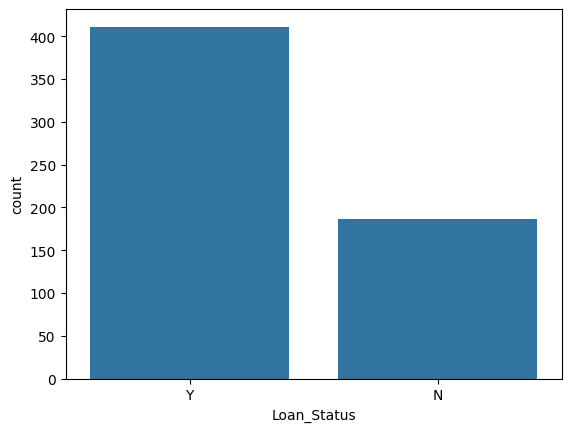

In [17]:
sns.countplot(x='Loan_Status',data=data)

<Axes: xlabel='LoanAmount'>

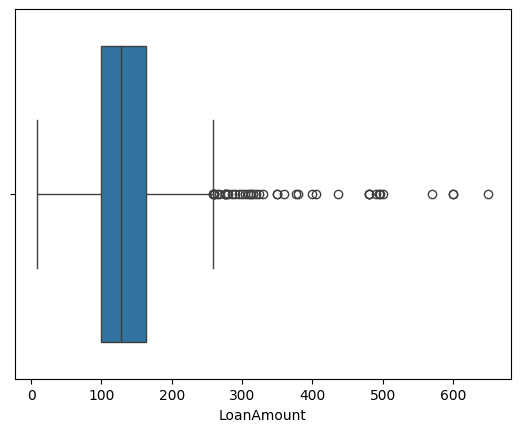

In [18]:
sns.boxplot(x='LoanAmount',data=data)

<Axes: xlabel='Loan_Status', ylabel='count'>

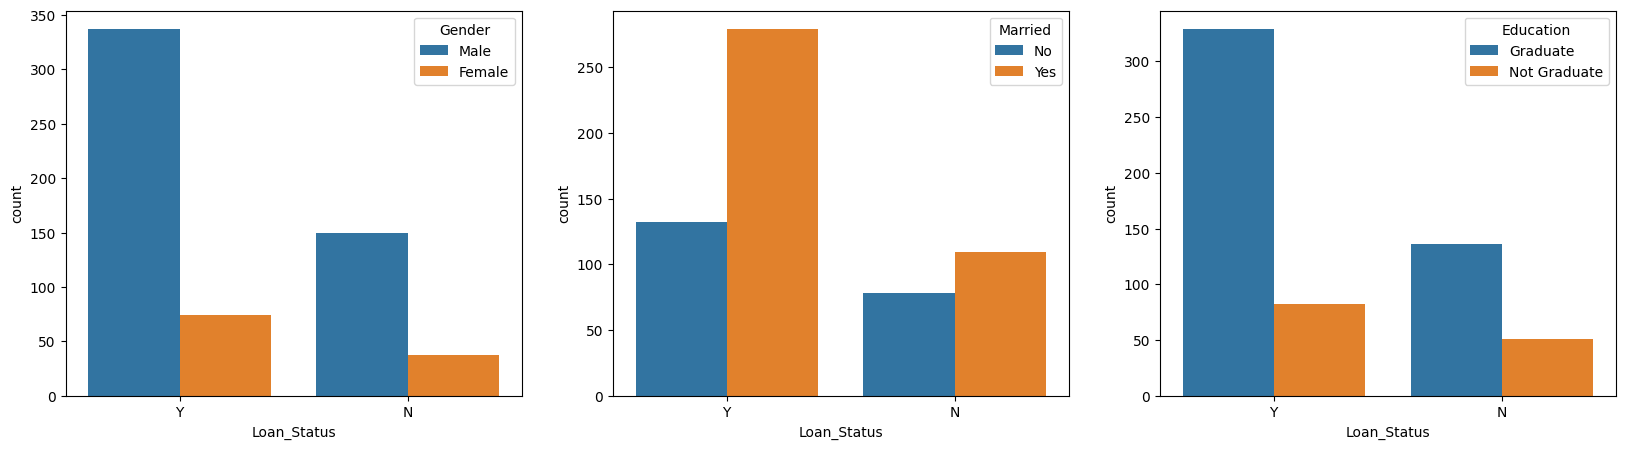

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x='Loan_Status',hue='Gender',data=data)
plt.subplot(1,3,2)
sns.countplot(x='Loan_Status',hue='Married',data=data)
plt.subplot(1,3,3)
sns.countplot(x='Loan_Status',hue='Education',data=data)

<Axes: xlabel='Loan_Status', ylabel='count'>

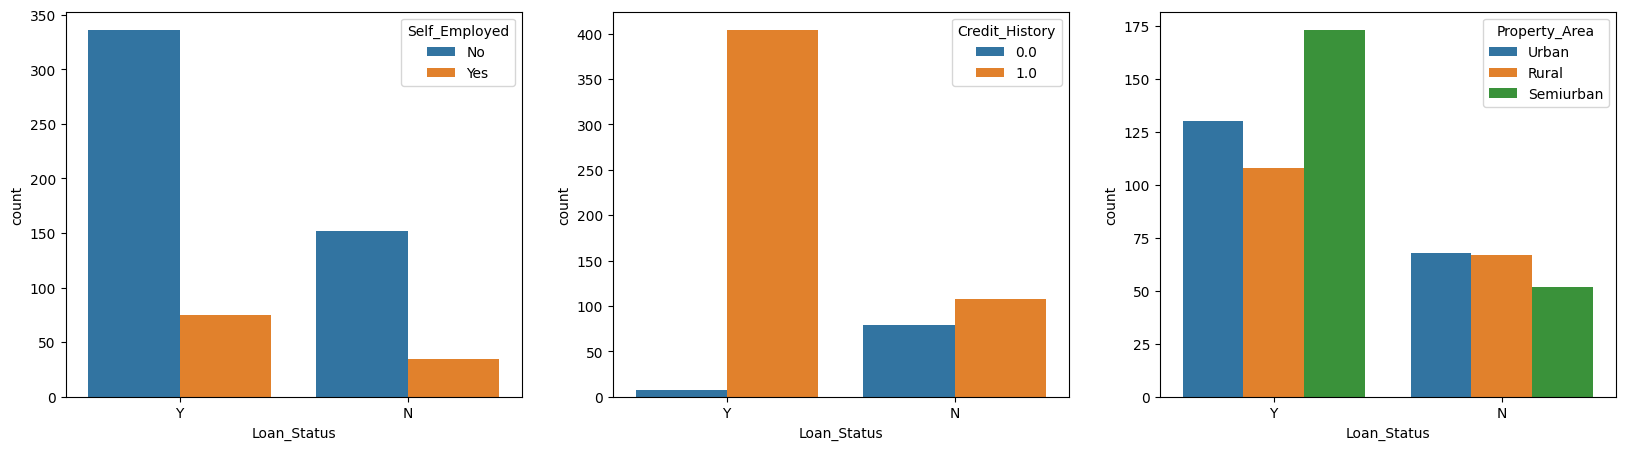

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x='Loan_Status',hue='Self_Employed',data=data)
plt.subplot(1,3,2)
sns.countplot(x='Loan_Status',hue='Credit_History',data=data)
plt.subplot(1,3,3)
sns.countplot(x='Loan_Status',hue='Property_Area',data=data)

In [21]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))
print("Columns of categorical variables:", list(obj[obj].index))

Categorical variables: 6
Columns of categorical variables: ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [22]:
# label encoding
data["Gender"].replace(["Male","Female"],[0,1],inplace=True) 
data["Married"].replace(["Yes","No"],[0,1],inplace=True)      
data["Education"].replace(["Not Graduate","Graduate"],[0,1],inplace=True) 
data["Self_Employed"].replace(["Yes","No"],[0,1],inplace=True) 
data["Property_Area"].replace(["Urban","Rural","Semiurban"],[0,1,2],inplace=True)     
data["Loan_Status"].replace(["Y","N"],[0,1],inplace=True)


In [23]:
# printing the first 5 rows of the dataframe
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0.0,1,1,5849,0.0,144.0,360.0,1.0,0,0
1,0,0,1.0,1,1,4583,1508.0,128.0,360.0,1.0,1,1
2,0,0,0.0,1,0,3000,0.0,66.0,360.0,1.0,0,0
3,0,0,0.0,0,1,2583,2358.0,120.0,360.0,1.0,0,0
4,0,1,0.0,1,1,6000,0.0,141.0,360.0,1.0,0,0


In [24]:
data["Dependents"]=data["Dependents"].astype(int)
data["CoapplicantIncome"]=data["CoapplicantIncome"].astype(int)
data["LoanAmount"]=data["LoanAmount"].astype(int)
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].astype(int)
data["Credit_History"]=data["Credit_History"].astype(int)

In [25]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,1,1,5849,0,144,360,1,0,0
1,0,0,1,1,1,4583,1508,128,360,1,1,1
2,0,0,0,1,0,3000,0,66,360,1,0,0
3,0,0,0,0,1,2583,2358,120,360,1,0,0
4,0,1,0,1,1,6000,0,141,360,1,0,0


<Axes: >

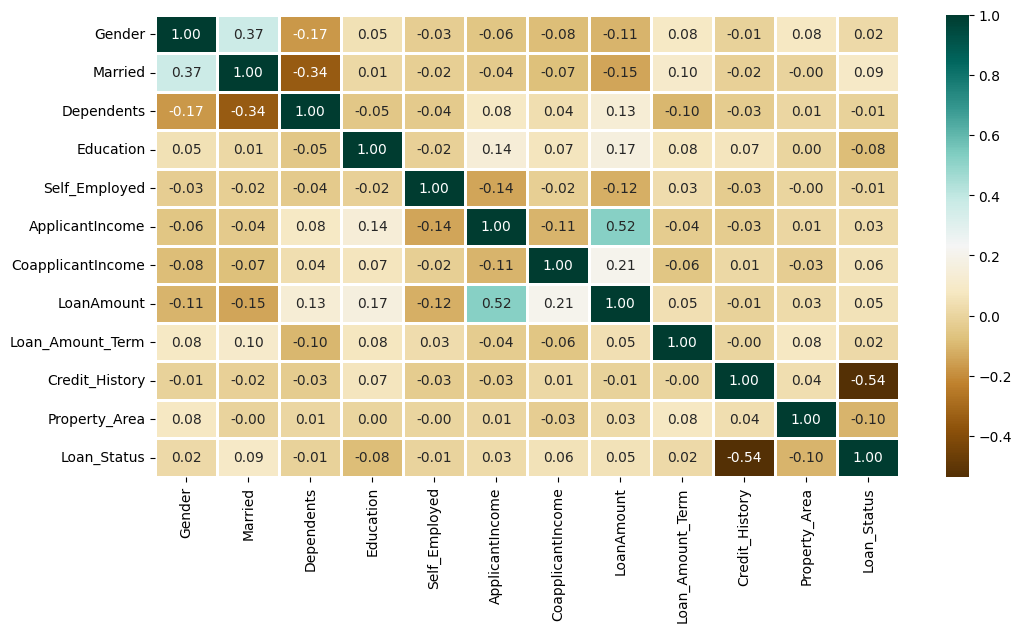

In [26]:
plt.figure(figsize=(12,6))
  
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

Model Building

In [27]:
from sklearn.model_selection import train_test_split
  
X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size= 0.60,                                                   test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.base import BaseEstimator

class TrainableClassifier(BaseEstimator):
    def __init__(self, classifier):
        self.classifier = classifier
    
    def fit(self, X, y):
        self.classifier.fit(X, y)
    
    def predict(self, X):
        return self.classifier.predict(X)







In [30]:

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
svc = SVC()
lc = LogisticRegression()








In [31]:
# Train the classifiers
knn_classifier = TrainableClassifier(knn)
rfc_classifier = TrainableClassifier(rfc)
svc_classifier = TrainableClassifier(svc)
lc_classifier = TrainableClassifier(lc)

knn_classifier.fit(X_train, Y_train)
rfc_classifier.fit(X_train, Y_train)
svc_classifier.fit(X_train, Y_train)
lc_classifier.fit(X_train, Y_train)

d:\studies\py app\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:

# Make predictions
Y_pred_train_knn = knn_classifier.predict(X_train)
Y_pred_test_knn = knn_classifier.predict(X_test)

Y_pred_train_rfc = rfc_classifier.predict(X_train)
Y_pred_test_rfc = rfc_classifier.predict(X_test)

Y_pred_train_svc = svc_classifier.predict(X_train)
Y_pred_test_svc = svc_classifier.predict(X_test)

Y_pred_train_lc = lc_classifier.predict(X_train)
Y_pred_test_lc = lc_classifier.predict(X_test)


train_accuracy_knn = 100 * metrics.accuracy_score(Y_train, Y_pred_train_knn)
train_accuracy_rfc = 100 * metrics.accuracy_score(Y_train, Y_pred_train_rfc)
train_accuracy_svc = 100 * metrics.accuracy_score(Y_train, Y_pred_train_svc)
train_accuracy_lc = 100 * metrics.accuracy_score(Y_train, Y_pred_train_lc)

test_accuracy_knn = 100 * metrics.accuracy_score(Y_test, Y_pred_test_knn)
test_accuracy_rfc = 100 * metrics.accuracy_score(Y_test, Y_pred_test_rfc)
test_accuracy_svc = 100 * metrics.accuracy_score(Y_test, Y_pred_test_svc)
test_accuracy_lc = 100 * metrics.accuracy_score(Y_test, Y_pred_test_lc)

print("Accuracy score of KNeighborsClassifier on training set:", train_accuracy_knn)
print("Accuracy score of KNeighborsClassifier on testing set:", test_accuracy_knn)

print("\nAccuracy score of RandomForestClassifier on training set:", train_accuracy_rfc)
print("Accuracy score of RandomForestClassifier on testing set:", test_accuracy_rfc)

print("\nAccuracy score of SVC on training set:", train_accuracy_svc)
print("Accuracy score of SVC on testing set:", test_accuracy_svc)

print("\nAccuracy score of LogisticRegression on training set:", train_accuracy_lc)
print("Accuracy score of LogisticRegression on testing set:", test_accuracy_lc)

Accuracy score of KNeighborsClassifier on training set: 78.77094972067039
Accuracy score of KNeighborsClassifier on testing set: 63.74999999999999

Accuracy score of RandomForestClassifier on training set: 98.32402234636871
Accuracy score of RandomForestClassifier on testing set: 80.83333333333333

Accuracy score of SVC on training set: 68.71508379888269
Accuracy score of SVC on testing set: 69.16666666666667

Accuracy score of LogisticRegression on training set: 80.16759776536313
Accuracy score of LogisticRegression on testing set: 81.25


Feature Importances


Accuracy score of RandomForestClassifier on training set: 98.32402234636871
Accuracy score of RandomForestClassifier on testing set: 80.83333333333333


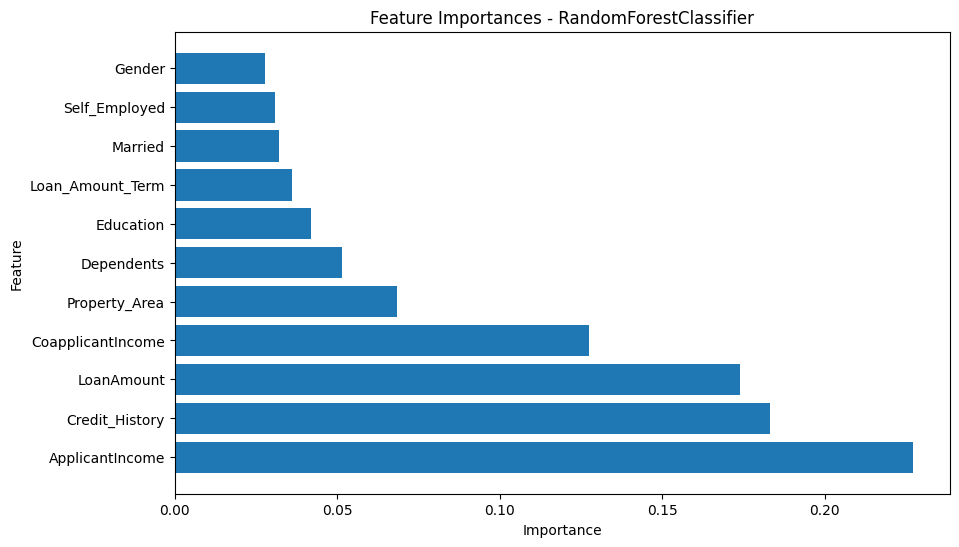

--------------------------------------
Accuracy score of KNeighborsClassifier on training set: 78.77094972067039
Accuracy score of KNeighborsClassifier on testing set: 63.74999999999999
Feature importances not available for KNeighborsClassifier
--------------------------------------
Accuracy score of SVC on training set: 68.71508379888269
Accuracy score of SVC on testing set: 69.16666666666667
Feature importances not available for SVC
--------------------------------------
Accuracy score of LogisticRegression on training set: 80.16759776536313
Accuracy score of LogisticRegression on testing set: 81.25
Feature importances not available for LogisticRegression
--------------------------------------


d:\studies\py app\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:

classifiers = [rfc, knn, svc, lc]

for clf in classifiers:
    clf.fit(X_train, Y_train)
    Y_pred_train = clf.predict(X_train)
    Y_pred_test = clf.predict(X_test)
    
    train_accuracy = metrics.accuracy_score(Y_train, Y_pred_train)
    test_accuracy = metrics.accuracy_score(Y_test, Y_pred_test)
    
    print("Accuracy score of", clf.__class__.__name__, "on training set:", 100 * train_accuracy)
    print("Accuracy score of", clf.__class__.__name__, "on testing set:", 100 * test_accuracy)
    
    if hasattr(clf, 'feature_importances_'):
        importances = clf.feature_importances_
        feat_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
        feat_df = feat_df.sort_values(by='importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        plt.barh(feat_df['feature'], feat_df['importance'])
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title('Feature Importances - ' + clf.__class__.__name__)
        plt.show()
    else:
        print("Feature importances not available for", clf.__class__.__name__)
    print("--------------------------------------")


In [35]:
import joblib

# Save the trained models
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(rfc, 'rfc_model.pkl')
joblib.dump(svc, 'svc_model.pkl')
joblib.dump(lc, 'lc_model.pkl')


['lc_model.pkl']

In [1]:
import gradio as gr
import joblib
import numpy as np
import pandas as pd

# Load the RFC model
rfc_model = joblib.load('rfc_model.pkl')

# Define the columns
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
        'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Define the prediction function
def predict_loan_approval(*features):
    labels = ['Rejected', 'Approved']

    # Create a DataFrame with the input features
    data = pd.DataFrame([np.array(features)], columns=cols)

    # Prepare data for prediction
    values = pd.DataFrame(columns=cols, dtype=int)
    values.loc[0] = [0] * len(values.columns)
    values.loc[0, num_cols] = data.loc[0, num_cols].astype(int)

    # Perform prediction
    prediction = rfc_model.predict(values)
    result = labels[prediction[0]]

    return 'Loan {}'.format(result)

# Define the input interface using Gradio
inputs = [gr.inputs.Textbox(label=col) for col in cols]
iface = gr.Interface(
    fn=predict_loan_approval,
    inputs=inputs,
    outputs=gr.outputs.Textbox(label="Loan Approval")
)

# Launch the Gradio interface
iface.launch()




d:\studies\py app\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Sammu\AppData\Local\Temp\ipykernel_18688\482485175.py:33: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs = [gr.inputs.Textbox(label=col) for col in cols]
C:\Users\Sammu\AppData\Local\Temp\ipykernel_18688\482485175.py:33: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs = [gr.inputs.Textbox(label=col) for col in cols]
C:\Users\Sammu\AppData\Local\Temp\ipykernel_18688\482485175.py:33: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs = [gr.inputs.Textbox(label=col) for col in cols]
C:\Users\Sammu\AppData\Local\Temp\ipykernel_18688\482485175.py

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
